In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts
import re,urllib3,time,csv,datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import matplotlib.dates as mpd
import plotly.offline as py_offline
import plotly.graph_objs as go

%matplotlib inline

In [2]:
data_location = "C:/Users/workspace/SH_tongliang/database/bitmex_1min/bitmex_1min/"
file1 = "ethz18_1m.csv"
file2 = "bchz18_1m.csv"
df1 = pd.read_csv(data_location + file1)
df2 = pd.read_csv(data_location + file2)

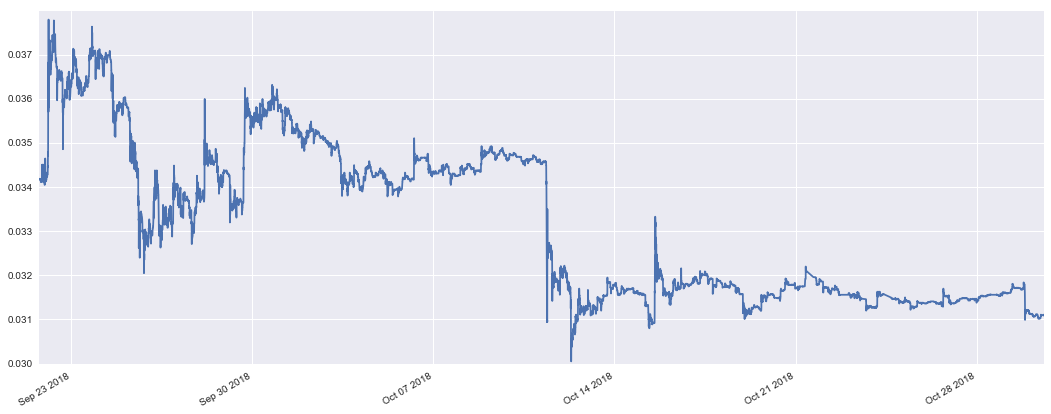

In [231]:
df1['close'].plot(figsize = (18, 7))

In [4]:
# Step 1：Laad csv file and preprocess: T/5T/15T/30T/H/2H/4H/D/W/M
def preprocess(data_location, file):
    df = pd.read_csv(data_location + file)
    df.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
    df.index = pd.DatetimeIndex(df['time'])
    return df

# Step 2：转变数据周期：
def resample(df, period):
    convrted_df = df.resample(period).last()
    convrted_df['open'] = df['open'].resample(period).first()
    convrted_df['high'] = df['high'].resample(period).max()
    convrted_df['low'] = df['low'].resample(period).min()
    convrted_df['close'] = df['close'].resample(period).last()
    convrted_df['volume'] = df['volume'].resample(period).sum()
    # Keep rows with at least 5 non-NaN values
    convrted_df.dropna(thresh=5, inplace=True)
    convrted_df.index = convrted_df['time']
    convrted_df['time'] = pd.DatetimeIndex(convrted_df['time'])
    return convrted_df

# 第三步：为能够plot蜡烛图做准备：
def cnvrt_date(convrted_df):
    cnvrted_date_df = convrted_df.copy()
    cnvrted_date_df['date'] = mpd.date2num(cnvrted_date_df['time'].dt.to_pydatetime())
    return cnvrted_date_df

# 第四步：plot蜡烛图：
# Improved version:
def plot_candlestick(cnvrted_date_df):
    py_offline.init_notebook_mode()
    candle_df = go.Candlestick( x   = cnvrted_date_df.index,
                                open = cnvrted_date_df['open'],
                                high = cnvrted_date_df['high'],
                                low  = cnvrted_date_df['low'],
                                close= cnvrted_date_df['close'])
    data = [candle_df]
    py_offline.iplot(data, filename='Candle Stick')

In [232]:
period = 'H'

df1 = preprocess(data_location, file1)
convrted_df1 = resample(df1, period)

df2 = preprocess(data_location, file2)
convrted_df2 = resample(df2, period)

In [234]:
convrted_df1.head()

,time,open,high,low,close,volume
time,,,,,,
2018-09-21 18:59:00,2018-09-21 18:59:00,0.03418,0.03419,0.03418,0.03419,16.0
2018-09-21 19:59:00,2018-09-21 19:59:00,0.03419,0.03419,0.03414,0.03415,155.0
2018-09-21 20:59:00,2018-09-21 20:59:00,0.03415,0.03417,0.03412,0.03413,196.0
2018-09-21 21:59:00,2018-09-21 21:59:00,0.03413,0.03451,0.03412,0.03434,1139.0
2018-09-21 22:59:00,2018-09-21 22:59:00,0.03434,0.03451,0.03420,0.03444,406.0


In [237]:
convrted_df1[(convrted_df1['time']>'2018-10-21 07:59:00') &(convrted_df1['time']<'2018-10-22 13:59:00') ]

,time,open,high,low,close,volume
time,,,,,,
2018-10-21 08:59:00,2018-10-21 08:59:00,0.03175,0.03192,0.03175,0.03192,2383.0
2018-10-21 09:57:00,2018-10-21 09:57:00,0.03192,0.03220,0.03192,0.03210,1238.0
2018-10-21 16:59:00,2018-10-21 16:59:00,0.03196,0.03196,0.03196,0.03196,99.0
2018-10-21 17:59:00,2018-10-21 17:59:00,0.03196,0.03196,0.03195,0.03195,1.0
2018-10-21 18:59:00,2018-10-21 18:59:00,0.03195,0.03195,0.03188,0.03190,84.0
2018-10-21 19:59:00,2018-10-21 19:59:00,0.03190,0.03190,0.03179,0.03180,355.0
2018-10-21 20:59:00,2018-10-21 20:59:00,0.03180,0.03180,0.03179,0.03180,215.0
2018-10-21 21:59:00,2018-10-21 21:59:00,0.03180,0.03187,0.03179,0.03187,358.0
2018-10-21 22:59:00,2018-10-21 22:59:00,0.03187,0.03192,0.03187,0.03189,167.0


In [241]:
df2[(df2['time']>'2018-10-21 09:50:00') &(df2['time']<'2018-10-21 14:30:00') ]

,time,open,high,low,close,volume
2018-10-21 09:51:00,2018-10-21 09:51:00,0.0709,0.0709,0.0709,0.0709,0
2018-10-21 09:52:00,2018-10-21 09:52:00,0.0709,0.0710,0.0709,0.0710,10
2018-10-21 09:53:00,2018-10-21 09:53:00,0.0710,0.0710,0.0710,0.0710,0
2018-10-21 09:54:00,2018-10-21 09:54:00,0.0710,0.0710,0.0710,0.0710,0
2018-10-21 09:55:00,2018-10-21 09:55:00,0.0710,0.0710,0.0710,0.0710,12
2018-10-21 09:56:00,2018-10-21 09:56:00,0.0710,0.0710,0.0710,0.0710,20
2018-10-21 09:57:00,2018-10-21 09:57:00,0.0710,0.0710,0.0710,0.0710,2
2018-10-21 09:58:00,2018-10-21 09:58:00,0.0710,0.0709,0.0709,0.0709,5
2018-10-21 09:59:00,2018-10-21 09:59:00,0.0709,0.0709,0.0709,0.0709,0
2018-10-21 10:00:00,2018-10-21 10:00:00,0.0709,0.0709,0.0709,0.0709,0


In [8]:
# Set up the parameters:

N1 = 5
N2 = 50
N3 = 10
N4 = 10
N5 = 2
N6 = 1
ATRLength = 26
Cost = 150000

In [ ]:
"""
Params //7个参数：四个均线的长度、一个ATR倍数、一个ATR均线长度、开仓手数

	Numeric N1(5);					//
	Numeric N2(50);					//
	Numeric N3(10);					//
	Numeric N4(10);  				//
	//Numeric N5(2);				// 
	Numeric N6(1);                  // ATR倍数
	Numeric ATRLength(26);
	Numeric Cost(150000);
	
Vars // 变量
	NumericSeries T1;				// Data0涨幅
	NumericSeries T2;				// Data1涨幅
	NumericSeries TP;				// 相对和		
	NumericSeries TM;				// 相对差
	NumericSeries MA1;				// 相对差短均线
	NumericSeries MA2;				// 相对差长均线
	NumericSeries MAS;				// 相对和短均线
	NumericSeries MAL;				// 相对和长均线
	Numeric Lots0;					// Data0开仓手数
	Numeric Lots1;					// Data1开仓手数
	
	NumericSeries Data0_ATRvalue;
	NumericSeries Data1_ATRvalue;
	
	NumericSeries Open_Data0;       // Data0开仓价格
	NumericSeries Open_Data1;       // Data1开仓价格
	
	BoolSeries Stop_Loss0;
	BoolSeries Stop_Loss00;
	BoolSeries Stop_Loss1;
	BoolSeries Stop_Loss11;
	BoolSeries Stop_Loss_value;
	
	NumericSeries MyEntryvalue(0);  // 开仓价值
	NumericSeries Myvalue(0);		// 持仓价值
	NumericSeries HPB(0);			// 
	NumericSeries TPSUM(0); 		// 和值累加
	NumericSeries TMSUM(0); 		// 差值累加
	NumericSeries preMA2(0);		// 上一次MA2值
	Numeric AA(1);					// 平仓条件
	//NumericSeries MaxCPP(0);		// 当前第一腿和第二腿浮盈和的最高值
	//NumericSeries CurrentPP(0);	// 当前第一腿和第二腿浮盈和
	NumericSeries truerange0(0);
	NumericSeries truerange1(0);
	
	NumericSeries ATR0(0);
	NumericSeries ATR1(0);
	NumericSeries ATR(0);
	
	
	BoolSeries BB(False);			// 开仓条件
	BoolSeries CC(False);			// 开仓条件
	
	
Begin
	T1 = (Data0.Close-Data0.Close[1]) / (Data0.Close[1]) * 100; 	// Data0涨幅
	T2 = (Data1.Close-Data1.Close[1]) / (Data1.Close[1]) * 100; 	// Data1涨幅
	TP = T1*(1-N3/100) + T2*(N3/100);								// 相对和 判断大趋势
	TM = T1*(1-N4/100) - T2*(N4/100);								// 相对差 判断强弱
	TPSUM = TPSUM + TP;												// 相对和累加
	TMSUM = TMSUM + TM;												// 相对差累加
	
	Lots0 = IntPart((Cost / Data0.Close) / (Data0.ContractUnit*Data0.BigPointValue));
	Lots1 = IntPart((Cost / Data1.Close) / (Data1.ContractUnit*Data1.BigPointValue));
	
	MA1 = AverageFC(TMSUM,N1);
	MA2 = AverageFC(TMSUM,N2);
	
	MAS = AverageFC(TPSUM,N1);
	MAL = AverageFC(TPSUM,N2);
	
	AA = Abs((preMA2 - MA2) / preMA2);
	BB = (MAL[1] < MAL || MAS[1] > MAL[1]); //
	CC = (MAL[1] > MAL || MAS[1] < MAL[1]); //
	
	//CurrentPP = Data0.PositionProfit + Data1.PositionProfit;
	//MaxCPP = Highest(CurrentPP,BarsSinceLastEntry);
	HPB = Highest(Portfolio_CurrentEquity,BarsSinceLastEntry);
	
	truerange0 = max(Data0.High,Data0.Close[1]) - Min(Data0.Low,Data0.Close[1]);
	truerange1 = max(Data1.High,Data1.Close[1]) - Min(Data1.Low,Data1.Close[1]);
	
	ATR0 = Average(truerange0, ATRLength);
	ATR1 = Average(truerange1, ATRLength);
	//ATR = (ATR0/Data0.Close + ATR1/Data1.Close)/2;
	
	Myvalue = (Lots0 * Data0.Close + Lots1 * Data1.Close); // 持仓动态成本
	
	Stop_Loss0 = ( Data0.Low <= Open_Data0 - N6 * ATR0 );    // Data0多仓止损条件  Data0有多仓时，Data0的最低价 小于等于 Data0的开仓价格减去N6个ATR
	Stop_Loss11 = ( Data0.High >= Open_Data1 + N6 * ATR1 );  // Data1空头仓止损条件 Data1有空仓时，Data1的最高价 大于等于 Data1的开仓价格加上N6个ATR
	
	Stop_Loss1 = ( Data1.Low <= Open_Data1 - N6 * ATR1 );    // Data1多仓止损条件  Data1有多仓时，Data1的最低价 小于等于 Data1的开仓价格减去N6个ATR
	Stop_Loss00 = ( Data0.High >= Open_Data0 + N6 * ATR0 );  // Data0空头仓止损条件 Data0有空仓时，Data0的最高价 大于等于 Data0的开仓价格加上N6个ATR
	
	Data0_ATRvalue = N6 * ATR0 * Lots0; // Data0的ATR价值
	Data1_ATRvalue = N6 * ATR1 * Lots1; // Data1的ATR价值
	
	Stop_Loss_value = ( (MyEntryvalue - Myvalue) >= (Data0_ATRvalue + Data1_ATRvalue) ); 
	
	PlotNumeric("差值短均线",MA1);
	PlotNumeric("差值长均线",MA2);
	//PlotNumeric("相对和",TPSUM);
	Commentary("持仓动态成本 "+Text(Myvalue));
	Commentary("开仓成本 "+Text(MyEntryvalue));
	Commentary("成本下跌： "+Text(MyEntryvalue - Myvalue));
	Commentary("Data0下跌限值： "+Text(N6 * ATR0 * Lots0));
	Commentary("Data1下跌限值： "+Text(N6 * ATR1 * Lots1));
	Commentary("Data下跌限值： "+Text(Data0_ATRvalue + Data1_ATRvalue));
	//Commentary("成本下跌% "+Text(( MyEntryvalue - Myvalue ) / MyEntryvalue));
	//Commentary("ATR "+Text(N5*ATR));
	
	//PlotBool("Stop_Loss0",Stop_Loss0);
	//PlotBool("Stop_Loss1",Stop_Loss1);
	//PlotBool("Stop_Loss00",Stop_Loss00);
	//PlotBool("Stop_Loss11",Stop_Loss11);
	PlotBool("Stop_Loss_value",Stop_Loss_value);
	
	// 平仓 死叉_Data0有多仓，Data1有空仓
	If(Data0.MarketPosition > 0 && Data1.MarketPosition < 0 && MA1[1] > MA2[1] && MA1 < MA2)
	{
		Commentary("平仓");
		Data0.Sell(0,Data0.Close);
		Data1.BuyToCover(0,Data1.Close);
		MyEntryvalue = 0;
		Myvalue = 0;
	}
	
	// 平仓 金叉_Data0有空仓，Data1有多仓
	If(Data0.MarketPosition < 0 && Data1.MarketPosition > 0 && MA1[1] < MA2[1] && MA1 > MA2)
	{
		Commentary("平仓");
		Data0.BuyToCover(0,Data0.Close);
		Data1.Sell(0,Data1.Close);
		MyEntryvalue = 0;
		Myvalue = 0;
	}
	
	// 开仓 金叉Data0做多，Data1做空
	If(Data0.MarketPosition == 0 && Data1.MarketPosition == 0 && MA1[1] < MA2[1] && MA1 > MA2 && BB) // && BB
	{
		Data0.Buy(Lots0,Data0.Close);
		Data1.SellShort(Lots1,Data1.Close);
		Open_Data0 = Data0.Close;  //记录Data0的开仓价格
		Open_Data1 = Data1.Close;  //记录Data1的开仓价格
		MyEntryvalue = (Lots0 * Data0.Close + Lots1 * Data1.Close) * 1.015;
	}
	
	// 开仓 死叉Data0做空，Data1做多
	If(Data0.MarketPosition == 0 && Data1.MarketPosition == 0 && MA1[1] > MA2[1] && MA1 < MA2 && CC) // && CC
	{
		Data0.SellShort(Lots0,Data0.Close);
		Data1.Buy(Lots1,Data1.Close);
		Open_Data0 = Data0.Close;  //记录Data0的开仓价格
		Open_Data1 = Data1.Close;  //记录Data1的开仓价格
		MyEntryvalue = (Lots0 * Data0.Close + Lots1 * Data1.Close) * 1.015;
		Return;
	}
	
	// 止损
	If( Data0.MarketPosition > 0 && Data1.MarketPosition < 0 && ((Stop_Loss0 && Stop_Loss11) || Stop_Loss_value)) // && ( MyEntryvalue - Myvalue ) / MyEntryvalue > N5*ATR
	{
		Commentary("触发止损");
		Data0.Sell(0,Data0.Close);
		Data1.BuyToCover(0,Data1.Close);
		MyEntryvalue = 0;
		Myvalue = 0;
	}
	
	If( Data0.MarketPosition < 0 && Data1.MarketPosition > 0 && ((Stop_Loss1 && Stop_Loss00) || Stop_Loss_value) ) // && ( MyEntryvalue - Myvalue ) / MyEntryvalue > N5*ATR
	{
		Commentary("触发止损");
		Data0.BuyToCover(0,Data0.Close);
		Data1.Sell(0,Data1.Close);
		MyEntryvalue = 0;
		Myvalue = 0;
	}
	
End

"""

In [146]:
data0 = convrted_df1.copy()
data1 = convrted_df2.copy()

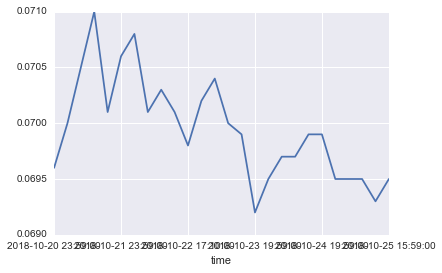

In [164]:
data1[(data1['time'] > '2018-10-20 19:59:00') & (data1['time'] < '2018-10-25 19:59:00')]['close'].plot()

In [ ]:
"""
T1 = (Data0.Close-Data0.Close[1]) / (Data0.Close[1]) * 100; 	// Data0涨幅
T2 = (Data1.Close-Data1.Close[1]) / (Data1.Close[1]) * 100; 	// Data1涨幅
TP = T1*(1-N3/100) + T2*(N3/100);								// 相对和 判断大趋势
TM = T1*(1-N4/100) - T2*(N4/100);								// 相对差 判断强弱
TPSUM = TPSUM + TP;												// 相对和累加
TMSUM = TMSUM + TM;												// 相对差累加
"""

In [148]:
data0['close_shifted'] = data0['close'].shift(1)
data1['close_shifted'] = data1['close'].shift(1)

T1 = data0['close'].diff()/data0['close_shifted']
T2 = data1['close'].diff()/data1['close_shifted']

TP = T1*(1-N3/100) + T2*(N3/100)
TM = T1*(1-N4/100) - T2*(N4/100)

TPSUM = TP.cumsum()
TMSUM = TM.cumsum()

In [46]:
def two_graphs_twinx(series1, series2):
    fig = plt.figure(figsize = (30, 15))
    
    ax1 = fig.add_subplot(1, 1, 1)
    ax2 = ax1.twinx()
    
    series1.plot(ax = ax1, color = 'blue', lw = 1)
    series2.plot(ax = ax2, color = 'red', lw = 1)

    ax1.axhline(0, color = 'blue', linestyle='--', lw=1)
    ax2.axhline(0, color = 'red', linestyle='--', lw=1)
    
def three_graphs_twinx(series1, series2, series3):
    
    fig = plt.figure(figsize = (30, 15))
    
    ax1 = fig.add_subplot(1, 1, 1)
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    
    series1.plot(ax = ax1, color = 'blue', lw = 1)
    series2.plot(ax = ax2, color = 'red', lw =1)
    series3.plot(ax = ax3, color = 'green', lw = 1)

    # ax1.axhline(-1.0, color='g', linestyle='--', lw=1)
    ax2.axhline(0, color = 'red', linestyle='--', lw=1)
    ax3.axhline(0, color = 'green', linestyle='--', lw=1)

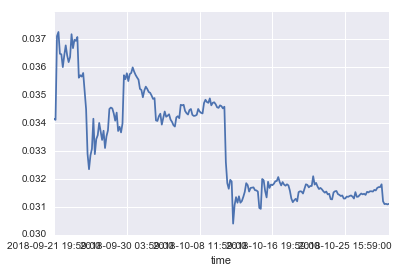

In [149]:
data0['close'].plot()

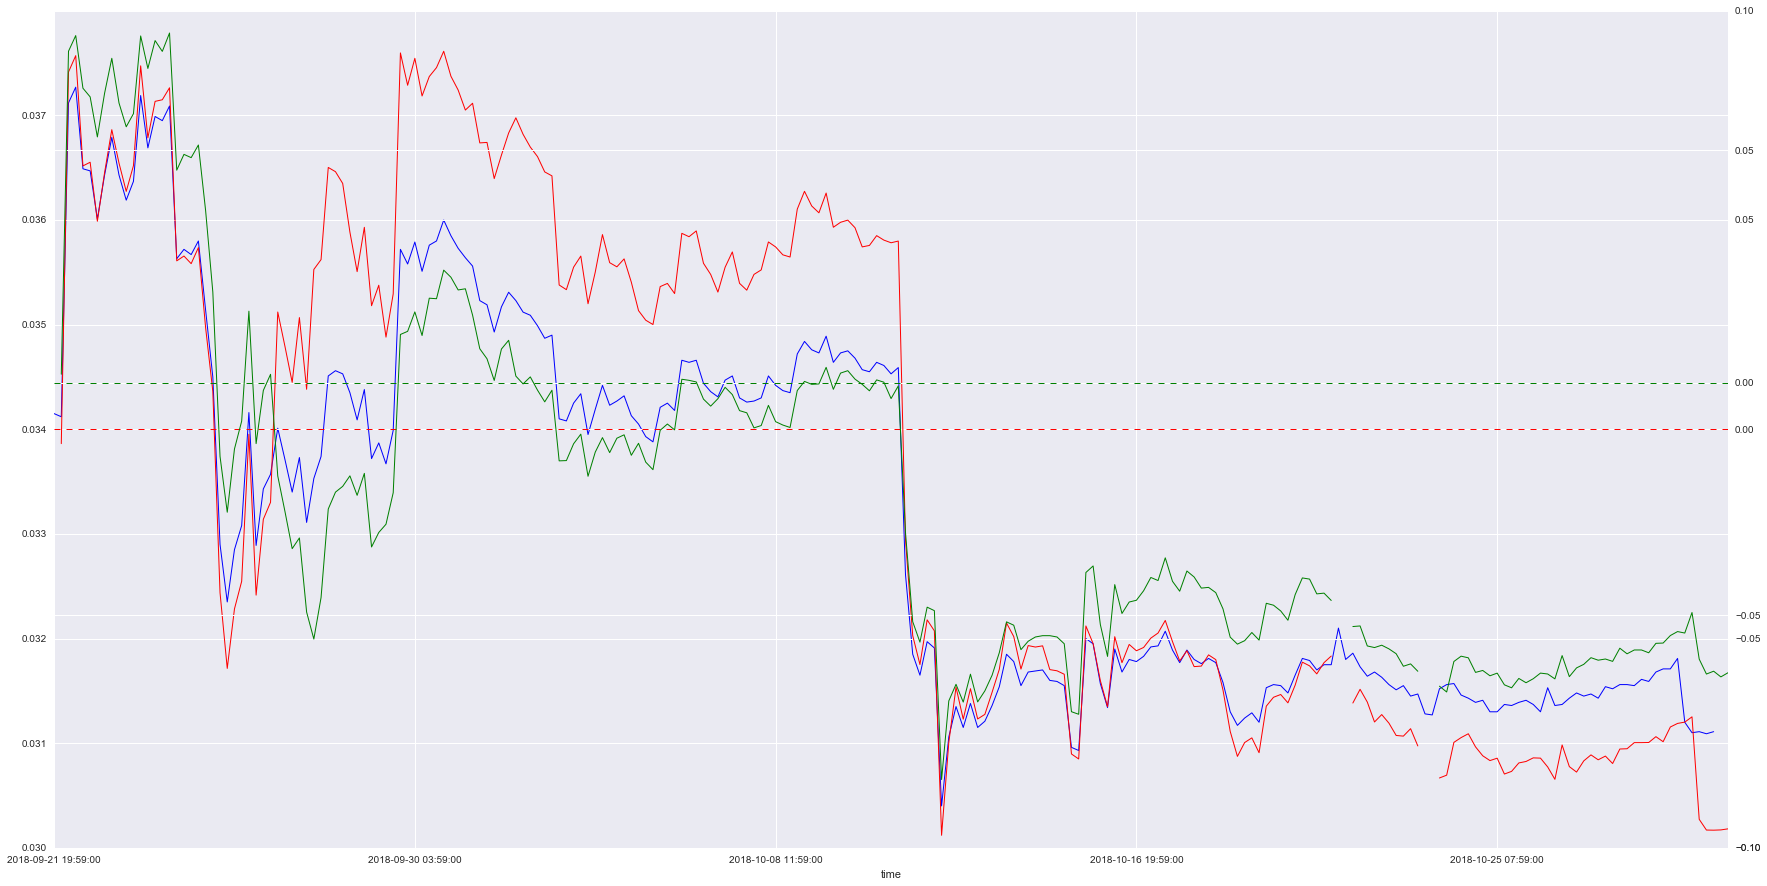

In [150]:
three_graphs_twinx(data0['close'], TPSUM, TMSUM)

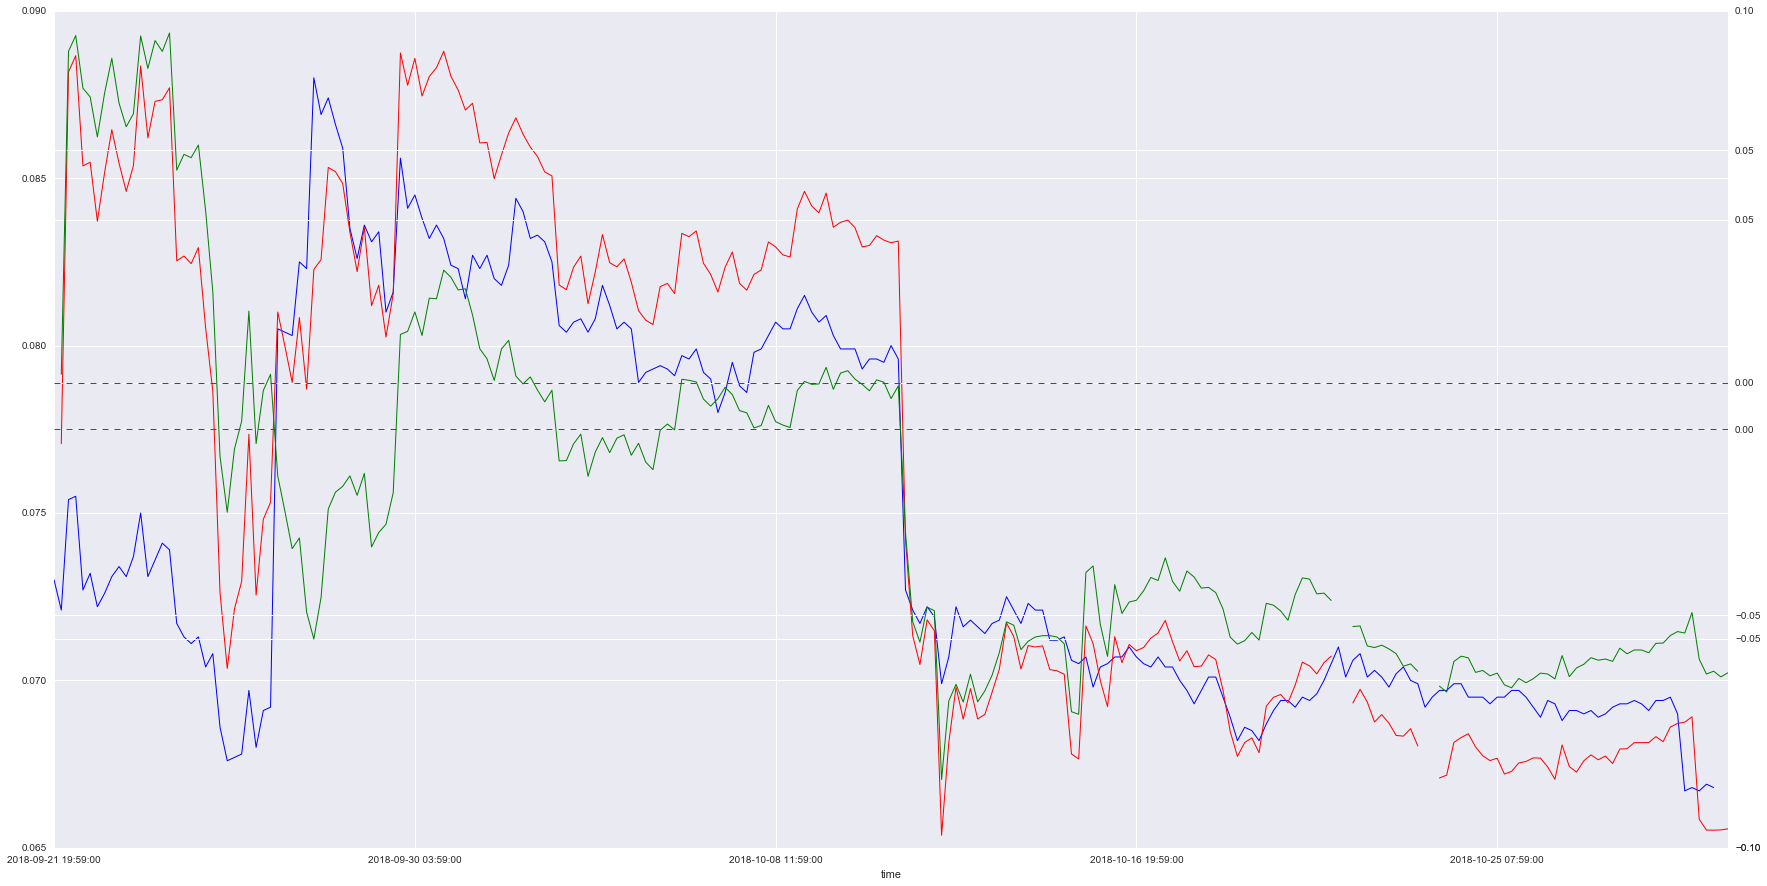

In [151]:
three_graphs_twinx(data1['close'], TPSUM, TMSUM)

In [49]:
"""
MA1 = AverageFC(TMSUM,N1);
MA2 = AverageFC(TMSUM,N2);

MAS = AverageFC(TPSUM,N1);
MAL = AverageFC(TPSUM,N2);

AA = Abs((preMA2 - MA2) / preMA2);

"""

'\nMA1 = AverageFC(TMSUM,N1);\nMA2 = AverageFC(TMSUM,N2);\n\nMAS = AverageFC(TPSUM,N1);\nMAL = AverageFC(TPSUM,N2);\n\nAA = Abs((preMA2 - MA2) / preMA2);\n\n'

In [152]:
MA1 = TMSUM.ewm(span= N1).mean()
MA2 = TMSUM.ewm(span= N2).mean()

TPSUM = TP.cumsum()
TMSUM = TM.cumsum()

MAS = TPSUM.ewm(span= N1).mean()
MAL = TPSUM.ewm(span= N2).mean()

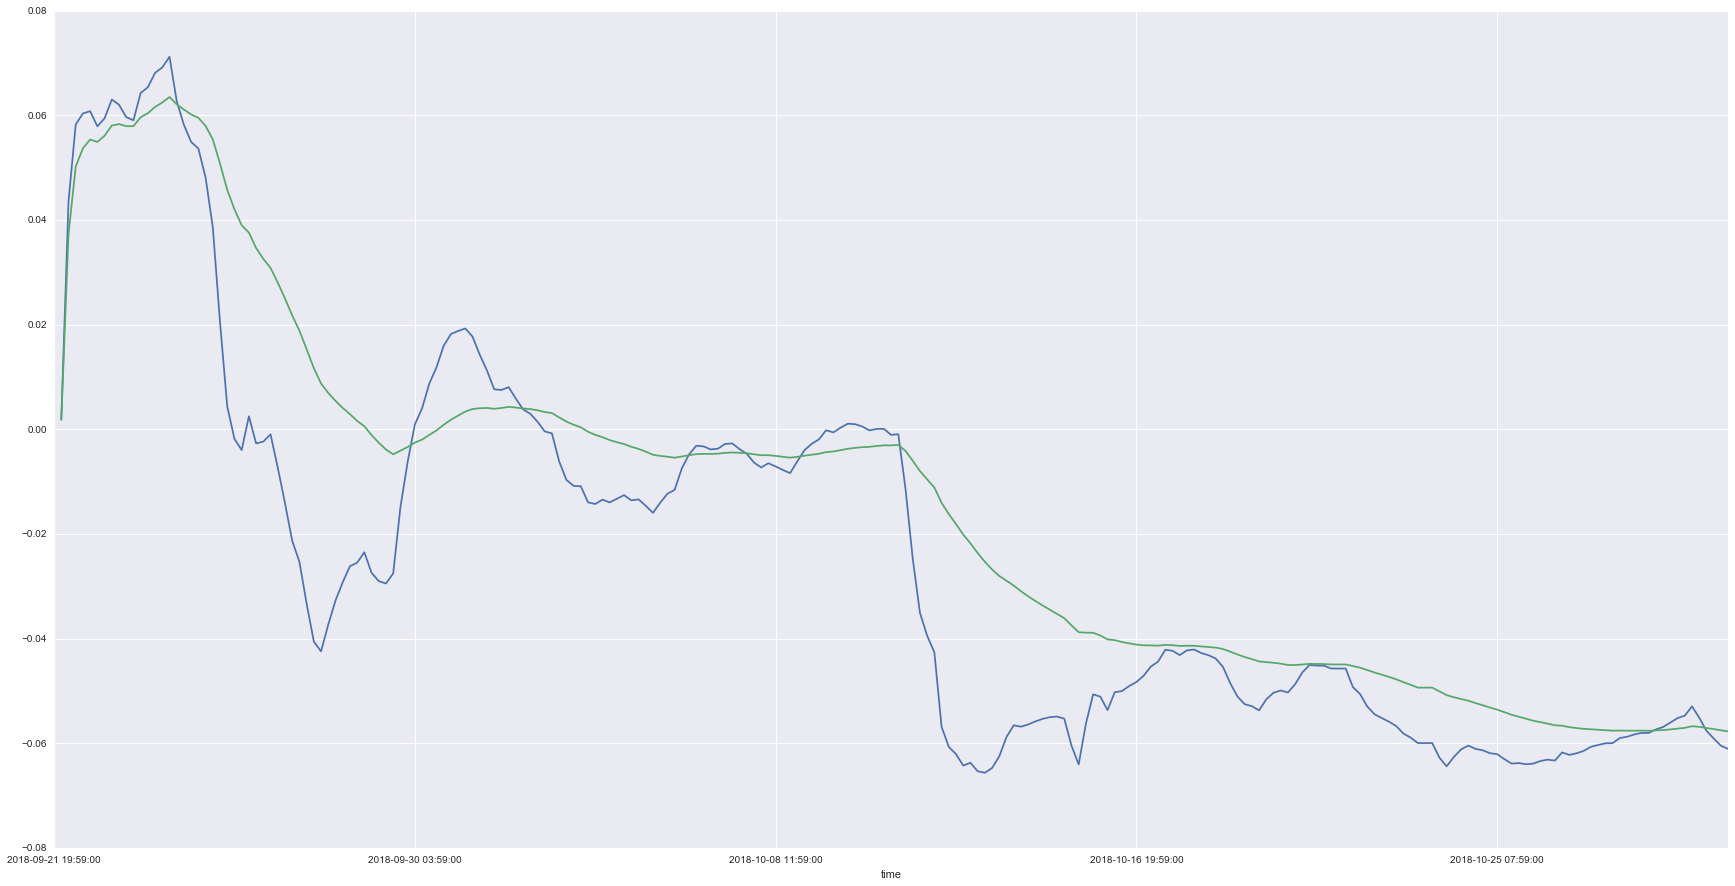

In [153]:
MA1.head(300).plot(figsize=(30, 15))
MA2.head(300).plot(figsize=(30, 15))

In [61]:
MA2_df = pd.DataFrame(MA2, columns=['MA2'])

MA2_df['pre_MA2'] = MA2_df['MA2'].shift(1)
MA2_df

AA = abs((MA2_df['pre_MA2'] - MA2_df['MA2'])/MA2_df['pre_MA2'])

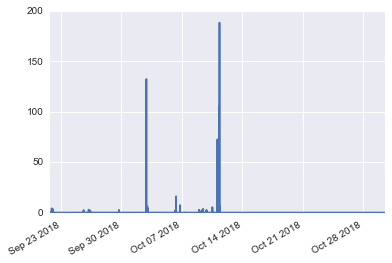

In [66]:
AA.plot()

# Statistical Analysis of Two Assets

In [154]:
eth = data0[['close']]
bch = data1[['close']]

In [158]:
eth.head()

,close
time,
2018-09-21 19:59:00,0.03415
2018-09-21 23:59:00,0.03412
2018-09-22 03:59:00,0.03712
2018-09-22 07:59:00,0.03727
2018-09-22 11:59:00,0.03649


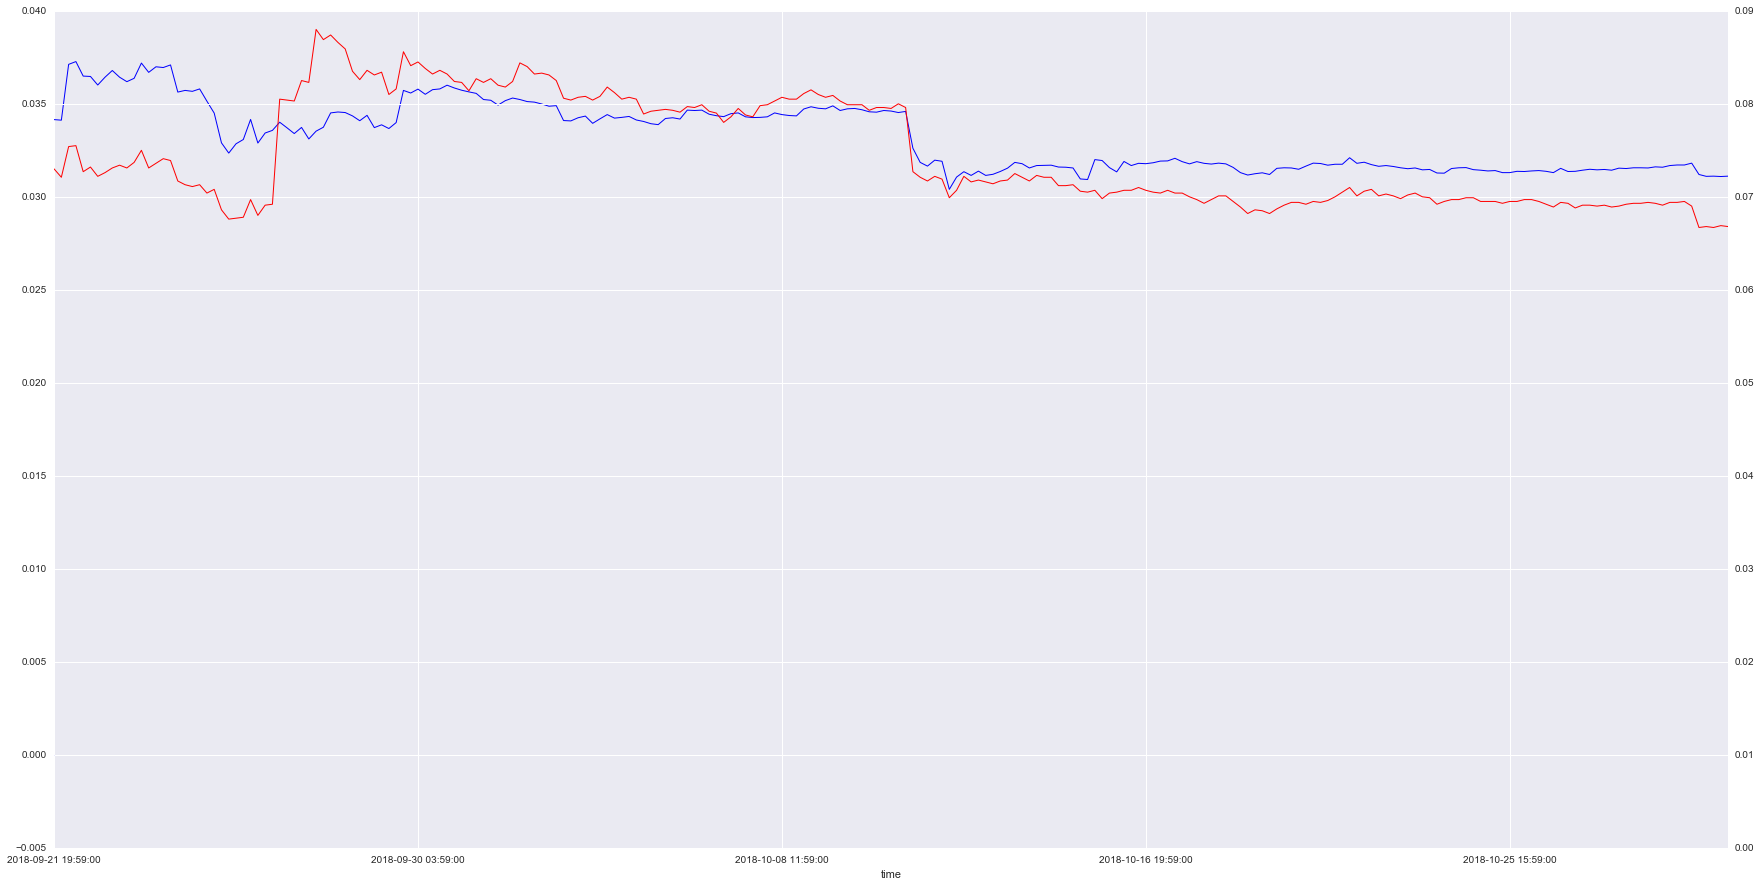

In [185]:
two_graphs_twinx(eth['close'], bch['close'])

## Let's see correlation first

In [181]:
eth_pct_sr = eth['close'].pct_change().dropna()
bch_pct_sr = bch['close'].pct_change().dropna()

In [222]:
len(eth_pct_sr)

230

In [225]:
len(eth_pct_sr.dropna())

230

Average correlation between eth pct_change and bch pct_change:


0.60072482258995352

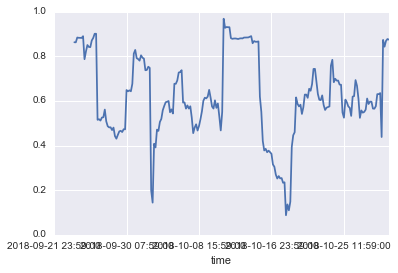

In [214]:
rolling_period = 20

rolling_corr = eth_pct_sr.rolling(window = rolling_period, min_periods=15).corr(bch_pct_sr)
rolling_corr.plot()

print ("Average correlation between eth pct_change and bch pct_change:")
eth_pct_sr.corr(bch_pct_sr)

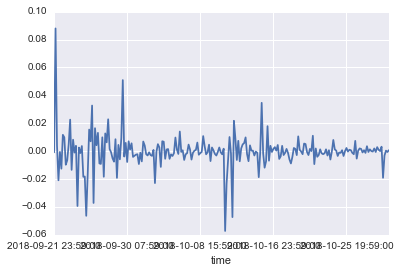

In [217]:
eth_pct_sr.plot()

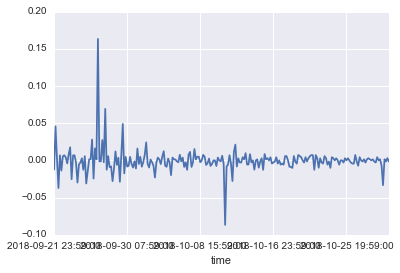

In [219]:
bch_pct_sr.plot()

In [220]:
spread = eth_pct_sr - bch_pct_sr
sprd_mean = spread.rolling(window=rolling_period, min_periods=15).mean()
sprd_stdev = spread.rolling(window=rolling_period, min_periods=15).std()
z_score = (spread - sprd_mean)/sprd_stdev

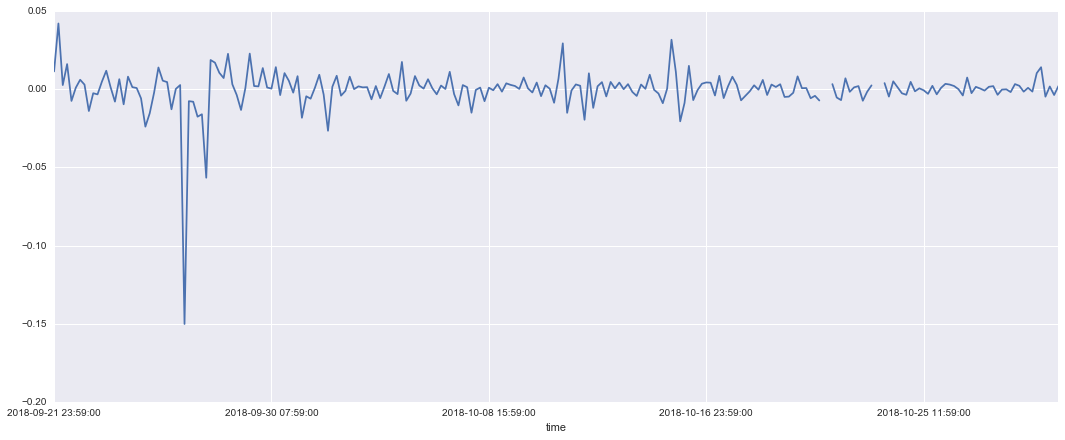

In [242]:
spread.plot(figsize=(18, 7))

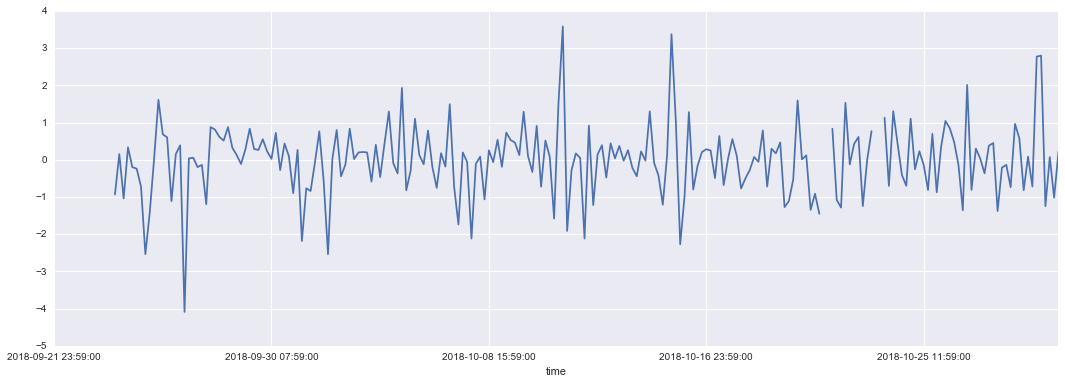

In [244]:
z_score.plot(figsize=(18, 6))